In [36]:
import random
import copy

import numpy as np

from numba import jit, njit, cuda

import matplotlib.pyplot as plt

# Simple 1D Random Walker

In [614]:
steps = int(1e1)
x0 = 0

In [616]:
X = [x0]*(steps+1)
T = [i for i in range(steps+1)]

In [618]:
for i in range(steps):
    rand = random.uniform(0, 1) - 0.5
    rand /= abs(rand)

    X[i+1] = X[i] + rand

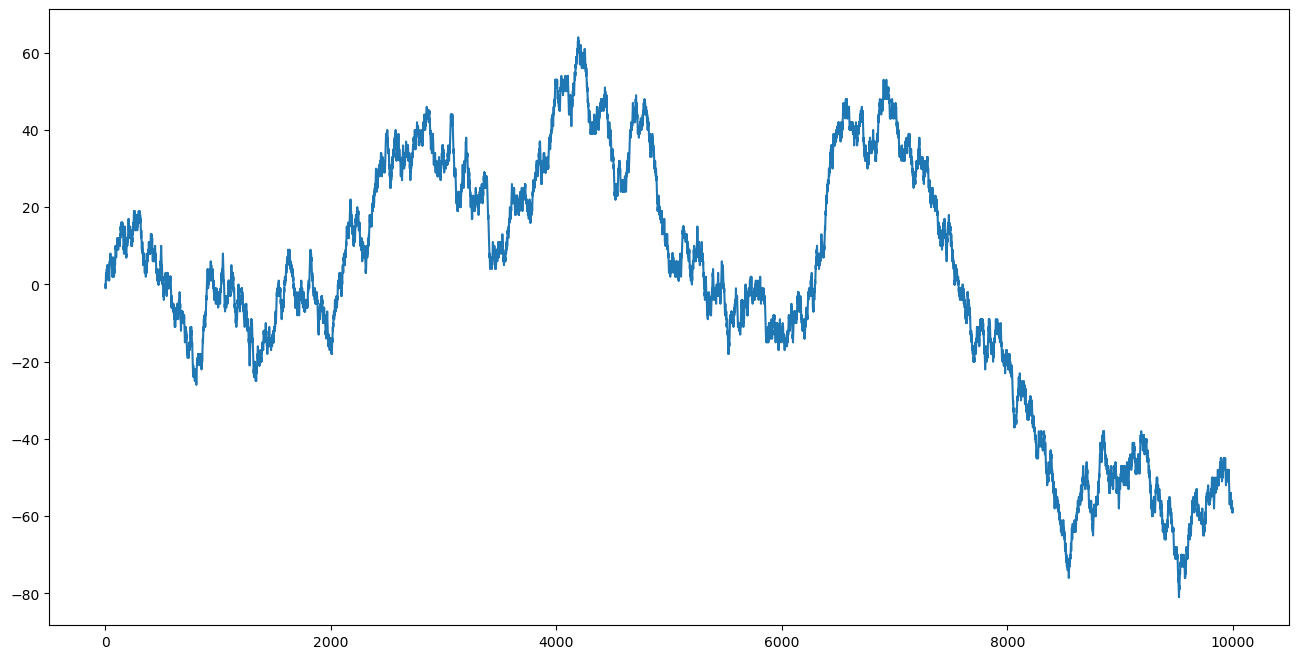

In [342]:
plt.figure(figsize=(16, 8))
plt.plot(T, X)
plt.show()

# Simple 1D Random Walker With Numpy

In [316]:
generator = np.random.default_rng()
n_steps = int(1e8)
x0 = 0

In [318]:
steps = generator.random(n_steps) - 0.5
steps /= np.abs(steps)

In [320]:
T = np.arange(n_steps+1)
X = np.insert(np.cumsum(steps), 0, x0)

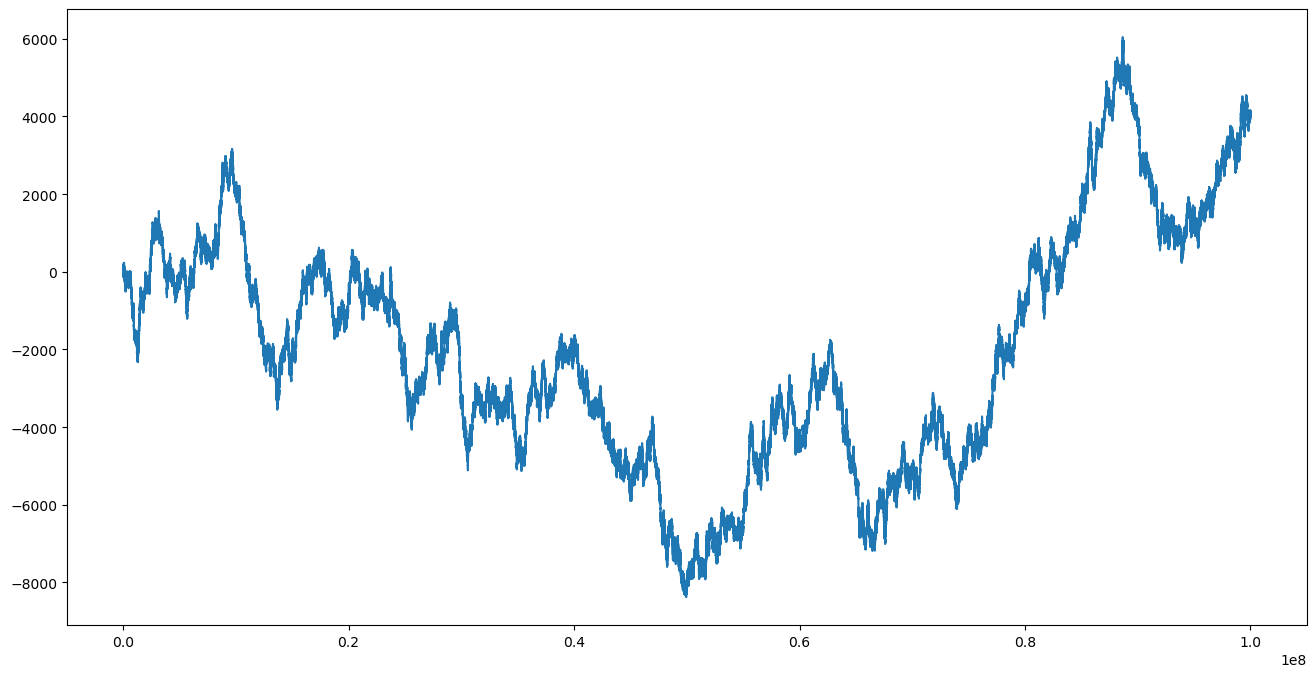

In [322]:
plt.figure(figsize=(16, 8))
plt.plot(T, X)
plt.show()

# Simple 1D Random Walker With Numba

In [374]:
# You can use @jit or @njit
# For nvidia graphic cards you can use @jit(target_backend='cuda')
@jit(target_backend='cuda')
def random_walker(steps):

    steps = int(steps)
    x0 = 0
    
    X = [x0]*(steps+1)
    T = [i for i in range(steps+1)]
    
    for i in range(steps):
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
    
        X[i+1] = X[i] + rand

    return X, T

In [390]:
steps = 1e8
X, T = random_walker(steps)

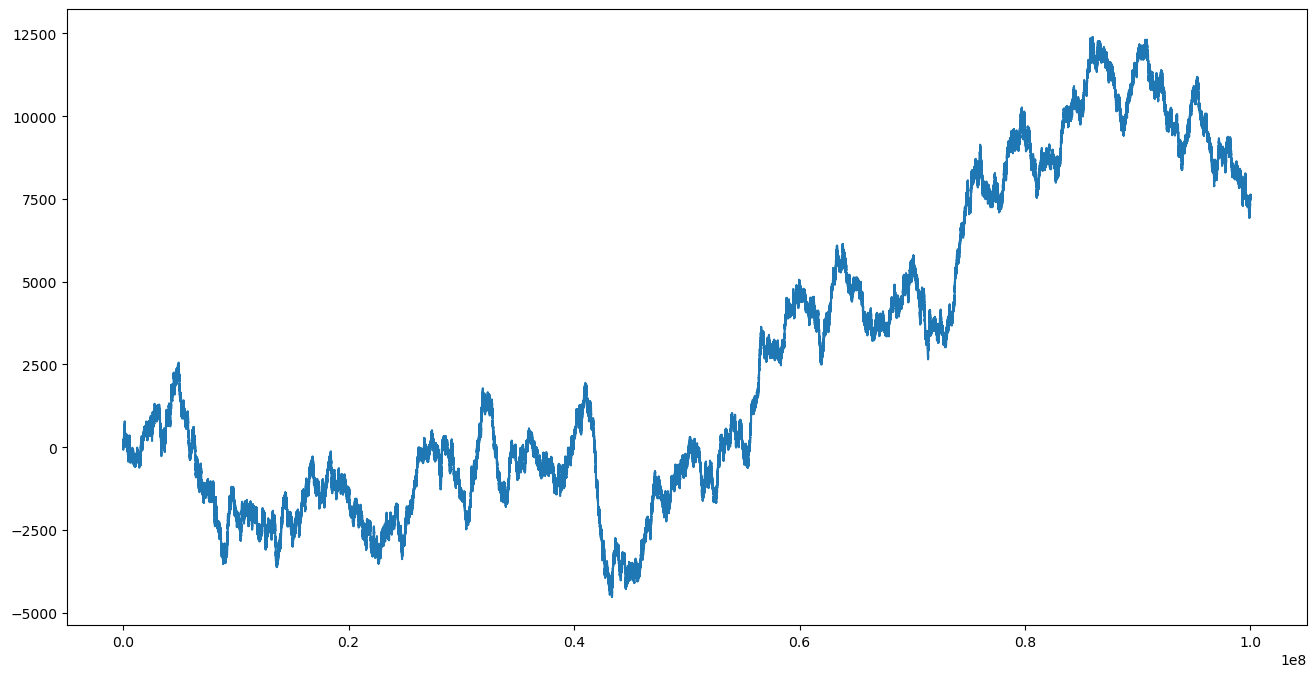

In [391]:
X = np.array(X)
T = np.array(T)
plt.figure(figsize=(16, 8))
plt.plot(T, X)
plt.show()

# N 1D Random Walkers

In [858]:
walkers = int(2e3)
steps = int(1e4)
x0 = 0

In [860]:
T = [i for i in range(steps+1)]

In [862]:
random_walks = []
for j in range(walkers):
    X = [x0]*(steps+1)
    
    for i in range(steps):
        rand = random.uniform(0, 1) - 0.5
        rand /= abs(rand)
    
        X[i+1] = X[i] + rand

    random_walks.append(X)

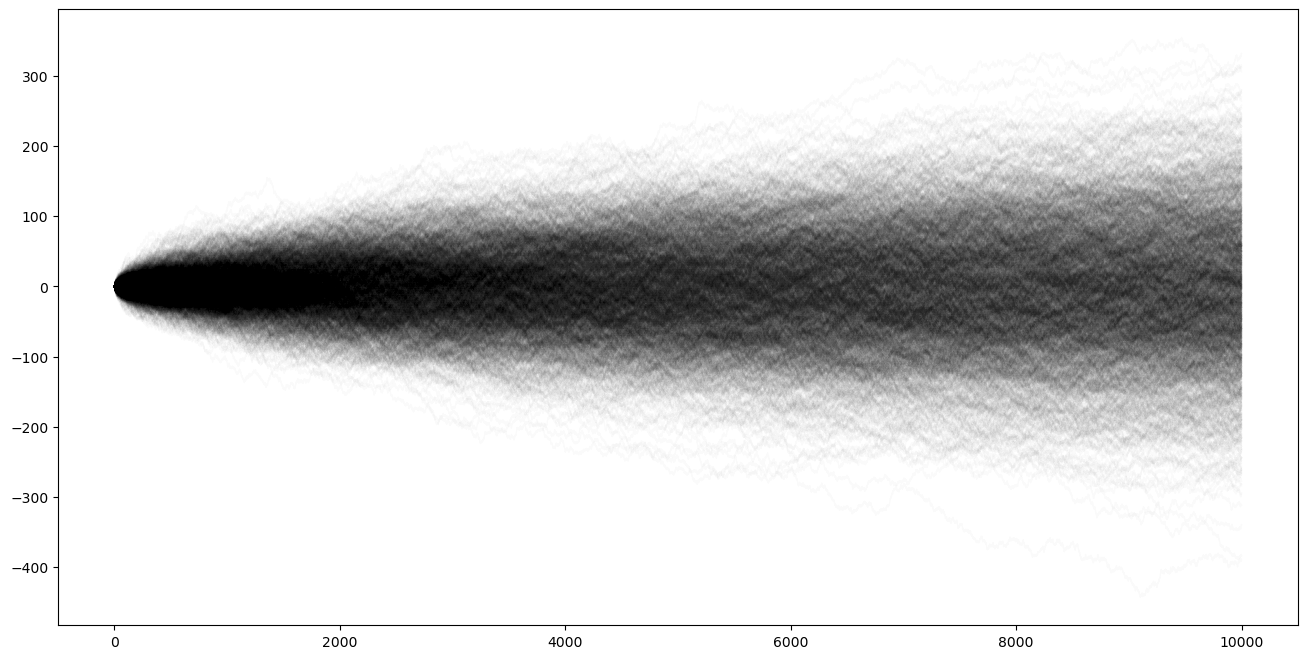

In [866]:
plt.figure(figsize=(16, 8))

for i in range(walkers):
    plt.plot(np.array(T), np.array(random_walks[i]), c='k', linewidth=1, alpha=0.02)

plt.show()

# N 1D Random Walkers With Numpy

In [1283]:
generator = np.random.default_rng()
walkers = int(2e4)
n_steps = int(1e3)
x0 = 0

In [1285]:
T = np.arange(n_steps+1)
steps = generator.random((n_steps, walkers)) - 0.5
steps /= np.abs(steps)

In [1287]:
X = np.insert(np.cumsum(steps, axis=0), 0, x0, axis=0)

In [1288]:
mean_pos = np.mean(X, axis=1)
mean_squared_dis = np.mean(X**2, axis=1)

print(f'Mean of Mean Positions at each time step = {mean_pos.mean()}')

Mean of Mean Positions at each time step = 0.14448021978021977


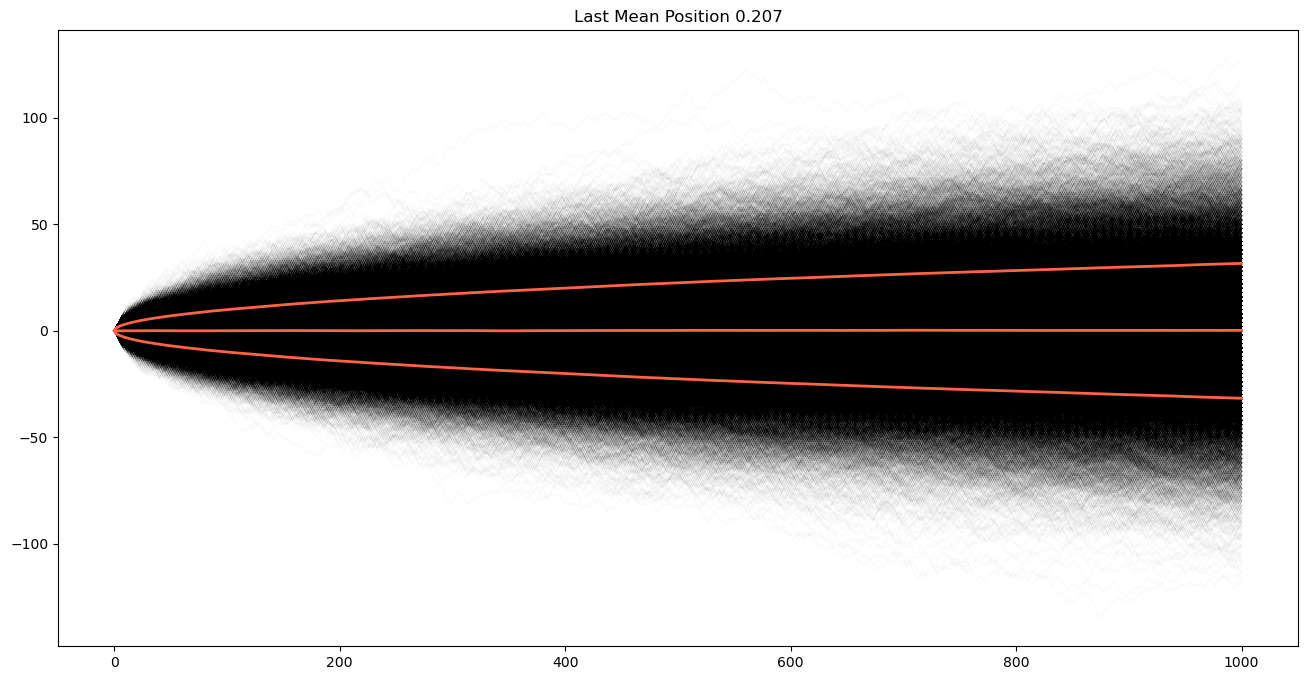

In [1291]:
plt.figure(figsize=(16, 8))

for i in range(int(walkers)):
    plt.plot(T, X[:,i], c='k', linewidth=1, alpha=0.02)

plt.plot(T, mean_pos, c='tomato', linewidth=2)
plt.plot(T, np.sqrt(mean_squared_dis), c='tomato', linewidth=2)
plt.plot(T, -np.sqrt(mean_squared_dis), c='tomato', linewidth=2)

plt.title(f'Last Mean Position {np.round(mean_pos[-1], 3)}')
plt.show()

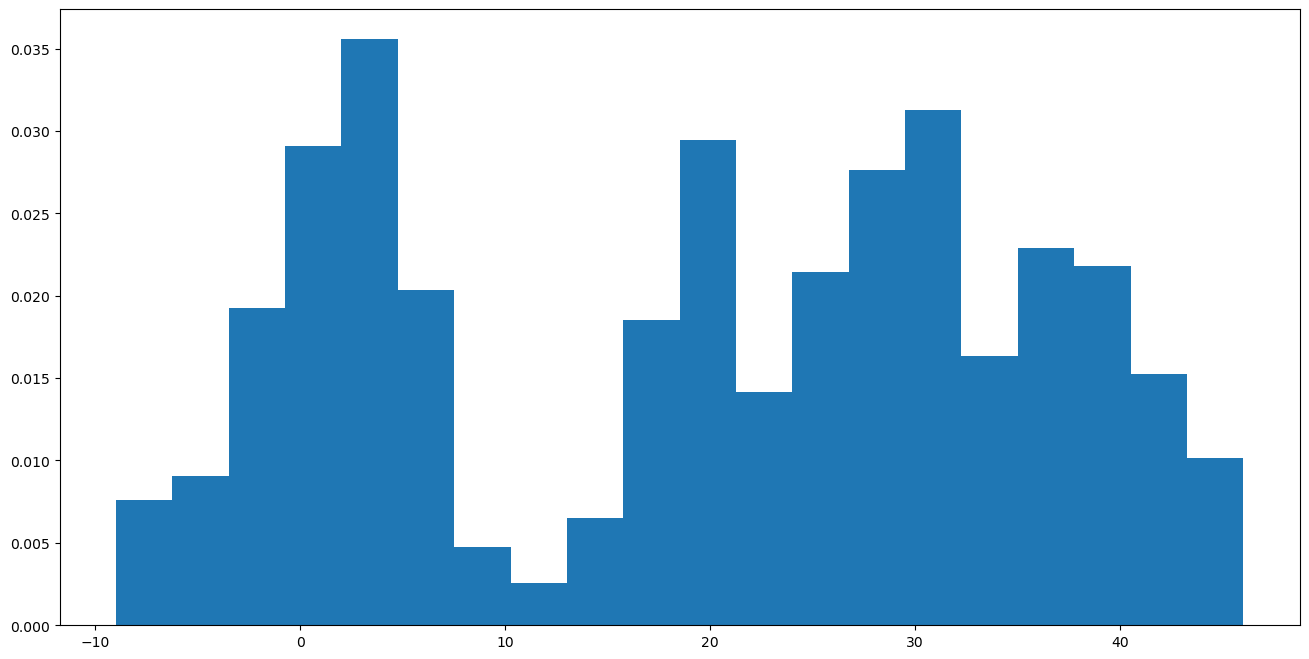

In [1292]:
plt.figure(figsize=(16, 8))

plt.hist(X[:, -1], density=True, bins=20)

plt.show()

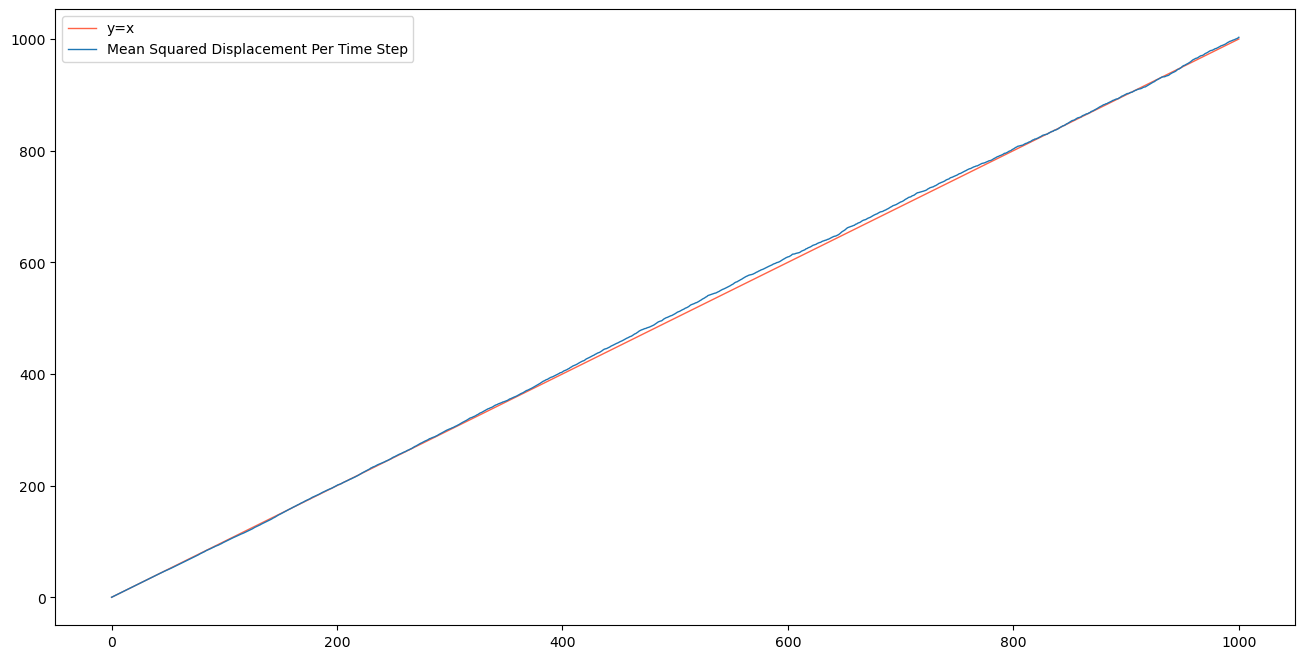

In [1293]:
plt.figure(figsize=(16, 8))

plt.plot(T, T, c='tomato', linewidth=1, label='y=x')
plt.plot(T, mean_squared_dis, linewidth=1, label='Mean Squared Displacement Per Time Step')

plt.legend()
plt.show()

# N 1D Random Walkers With Numba

In [938]:
# You can use @jit or @njit
# For nvidia graphic cards you can use @jit(target_backend='cuda')
@jit(target_backend='cuda')
def n_random_walkers(walkers, steps):

    walkers = int(walkers)
    steps = int(steps)
    x0 = 0
    
    T = [i for i in range(steps+1)]
    
    random_walks = []
    for j in range(walkers):
        X = [x0]*(steps+1)
        
        for i in range(steps):
            rand = random.uniform(0, 1) - 0.5
            rand /= abs(rand)
        
            X[i+1] = X[i] + rand
    
        random_walks.append(X)

    return random_walks, T

In [948]:
walkers = 6e3
steps = 2e4
random_walks, T = n_random_walkers(walkers, steps)

In [950]:
random_walks = np.array(random_walks)
T = np.array(T)

plt.figure(figsize=(16, 8))

for i in range(int(walkers)):
    plt.plot(T, random_walks[i], c='k', linewidth=1, alpha=0.02)

plt.show()


KeyboardInterrupt

